In [2]:
import pandas as pd
cf = pd.read_parquet("../concat_feature.parquet")

In [8]:
cf[['ig_username','category']].drop_duplicates(subset=['ig_username'])

,ig_username,category
0,wendyalane1,df_buy_insta_accounts_add_on
0,tylerlough,df_buy_insta_accounts_add_on
0,davidminkin,df_buy_insta_accounts_add_on
0,officialkristagreener,df_buy_insta_accounts_add_on
0,erika_nova,df_buy_insta_accounts_add_on
...,...,...
0,officialclubsocial,buy_biz
0,sainturbain,buy_biz
0,a1republic,buy_biz
0,mtoagency,buy_biz


In [6]:
pred = pd.read_csv("liwc_results/df_buy_biz_prediction.csv")

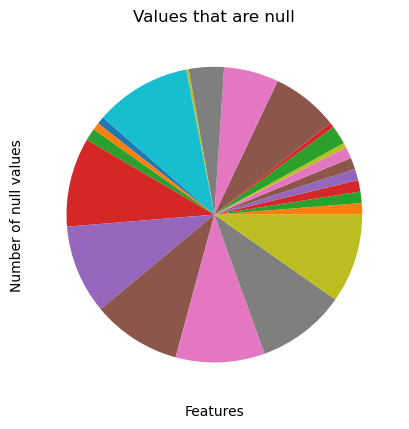

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a DataFrame
df = pred#pd.DataFrame({'A': [1, 2, np.nan, 4], 'B': [3, 4, np.nan, 8]})


# Create a pie chart
plt.pie(df[df.user.isnull()].sum())

# Set the title and labels of the pie chart
plt.title('Values that are null')
plt.xlabel('Features')
plt.ylabel('Number of null values')

# Show the pie chart
plt.show()